# Spotify songs popularity Prediction


# Introduction
Spotify is popular application for streaming songs ,audio podcasts and many more.In this assignment our main aim is to predict the popularity of the songs by using different attributes given in the dataset such as danceablity, valence, db, energy,etc.. Using these attributes we are making a machine learning model that gives a popularity prediction that can be used to predict the popularity of other songs which can help artists and labels to identify popular songsand produce songs that have high chance of popularity. Jupyter notebook shows the information on handeling the typical reggression problem. **Regression** It is a statistical technique that relates a dependent variable to one or more independent variables. This workbook shows our approach starting from handeling the data to visualisation and implementing different models to predict the variable.
The data we have used has various attributes of a song as mentioned below-	

**Id**-Each Song has a unique Id. It does not provide any relevant information and it has no correlation with the data
**Title**-Title Track. It is mostly different for every song and it is not useful so we will drop it as it is categorical
**Artist**-Name of the artist. Artist can have plenty songs but its categorical value and we will be dropping it as well
**Top genre**-It defines the genre of the song.
**year**-year in which song is released
**Bpm**-beats per minute. It is very important factor. Each genre has different Bpm	
**nrgy**-energy	is the measure of energy and intensity and its value ranges from 0.0 to 1.0
**dnce**-danceability of a song describes how good is a song to dance on. The range of dancebility varies from 0.0 to 1.0.	
**dB**-loudness. A good song has usually range of dB of 60 - 85. 
**live**-liveness. Higher liveness represent increased probability that song was performed live.	
**val**-valence(higher value means more positive mood for the song)
**dur**-length of the song.
**acous**-acousticness of the song.It is science that deals with the study of sound, its production, transmission, and effects.
**spch**-speechiness is the vocal phrasing of a song 
**pop**-popularity score. This is the data which we want to predict using various models. We will carry out numerical analysis to predict the values in this column.

# 1. Packages used
**1.pandas**- to read csv file and working with datasets.
**2.numpy**- for manipulating data and performing mathematical operations on the dataset.
**3.matplotlib**- for plotting graphs and visualisation of the data.
**4.seaborn**- for plotting the corelation matrix in the form of heatmap.
**5.sklearn**- library for using different machine learning models to train our models.The models we have used are:
          **a.Linear reggression b.Support Vector Machine  c.Random Forest d.Decision Tree e.Gradient boosting regressor.**
**6.sklearn.metrics**- library to evaluate the quality of models prediction.

In [1]:
import pandas as pd #To load the dataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [2]:
song_train_data=pd.read_csv("CS98XRegressionTrain.csv") # Load the Training data
song_test_data= pd.read_csv("CS98XRegressionTest.csv") # Load the Testing data

# 2.Exploratory and preprocessing of the data
Here we have explored the raw data. This is helpful in looking the basic format of the dataset. After looking at data we clean it for better performance and good accuracy of our models. First we have get the mathematical description of the dataset. After looking at the description we will look for null and duplicate values in dataset and remove the rows with null values. There are 15 null values and 0 duplicate values. We have eradicated all of these.

In [3]:
song_train_data.describe() # Statistical value of numerical columns of the song_train_data

,Id,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,227.000000,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,130.914094,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1.000000,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,114.000000,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,227.000000,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,340.000000,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,453.000000,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


By computing and displaying summary statistics using the Describe() function, we can see that the mean of the pop column is 60. The pop might have a number as high as 84 or as low as 26, respectively. The related percentiles, which show the values below which a particular percentage of observations in a collection of observations fall, are shown in the 25%, 50%, and 75% rows.

In [4]:
song_train_data.info() # Find the data structure of dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         453 non-null    int64 
 1   title      453 non-null    object
 2   artist     453 non-null    object
 3   top genre  438 non-null    object
 4   year       453 non-null    int64 
 5   bpm        453 non-null    int64 
 6   nrgy       453 non-null    int64 
 7   dnce       453 non-null    int64 
 8   dB         453 non-null    int64 
 9   live       453 non-null    int64 
 10  val        453 non-null    int64 
 11  dur        453 non-null    int64 
 12  acous      453 non-null    int64 
 13  spch       453 non-null    int64 
 14  pop        453 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 53.2+ KB


There are 453 rows of data in every column of song_train_data except 'top genre' column which has 438 rows other 15 rows are missing (Null value). So we drop the rows associated with missing values.

In [5]:
song_train_data=song_train_data.dropna() #Dropping the null values in the dataset
song_train_data.duplicated().sum() # Duplicate value- Check if there is any duplicate value.

0

In [6]:
song_train_data= song_train_data.drop(["title","artist", "top genre"], axis=1) # Dropping the categorical column 

# 3.Feature selection 

Now we want to eliminate extraneous data, which can lower accuracy or will have no effect on accuracy. In order to shorten training time and remove noise, we want to choose a subset of the features we already have. we consider the features that have linear correlation to help us do that.

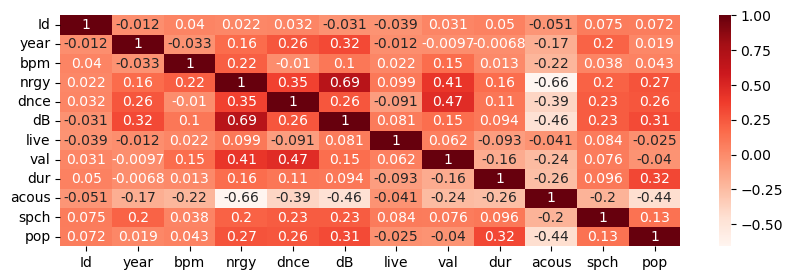

In [7]:
# finding  the correlation of attributes by using heat map.
figure, axis=plt.subplots(figsize=(10,3))
corr=song_train_data.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds, ax=axis)
plt.show()

# 4.Data Analysis
From the heat map we can observe that various attributes 'Id', 'year', 'live', 'val', 'bpm' have weak or inverse correlation to the popularity column(pop). so for better accuracy it's wise to drop these attributes. Other imporant observations are-

1.acous is giving negative corelation still we have not dropped acous column because it has a very high negative impact on the popularity, so, it is important for us to keep this column to train our models.

2.nrgy, dnce, dB, dur, acous, spch are giving a strong corelation with popularity which will play a good impact on the building the model with good accuracy score.

3.There are many attributes such as Id, year, val,etc. which have very weak corelation with popularity.So, they are not very lokely to impact the popularity of the song.Hence these columns are dropped from the dataset in the subsequent steps.

In [8]:
#We have defined new variable as 'Id' as values starting from 0 so that it would be easy focus to check for the null values and handle the test data more conveniently.
Id=song_test_data.iloc[:,0]
song_train_data= song_train_data.drop(["Id", "year", "val", "bpm", "live"], axis=1)

In [9]:
##Dropping the columns that are not highly impacting the popularity as observed from the heatmap.
song_test_data=song_test_data.drop(["Id", "year","val", "live", "bpm", "title","artist", "top genre"], axis=1)

Now transform the acosutic data since we have the negative values. For that we need robust scalar so that scaling is immune to outliners

<AxesSubplot:ylabel='Density'>

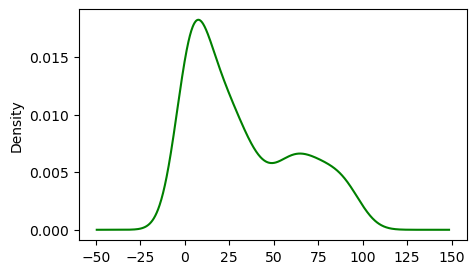

In [10]:
song_train_data.acous.plot.density(color="green" ,figsize=(5,3))

In [11]:
##Here we have used MinMaxScaler and RobustScaler to normalise the data and Scale the data for better plot
scalar=RobustScaler() 
song_train_data["acous"]=scalar.fit_transform(np.array(song_train_data["acous"]).reshape(-1,1))

**linear regression**: It uses independent variables to estimate the value of dependent variables in dataset.

In [12]:
# Build a Linear regression model. Define x=indepent variables, y=target variable 
x=song_train_data.drop(["pop"], axis=1)
y=song_train_data["pop"]
# Now split the data into train and test data
from sklearn import model_selection
x_train, x_test, y_train, y_test=model_selection.train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
lnr=LinearRegression() #Importing the linear regression model to train the data
lnr.fit(x_train, y_train) # to fit the linear model
y_pred= lnr.predict(x_test) # Making prediction of the model
lnr.score(x_test, y_test)# Accuracy

0.3643613408559908

After getting these values we have used to predict the test data and the accuracy score for our model. Finally we have calculated **RMSE(ROOT MEAN SQUARE ERROR)** for evaluation of our model.

In [14]:
rmse_lr= np.sqrt(metrics.mean_squared_error(y_test, y_pred)) # model evaluation
print(rmse_lr) #To find error of model we use rmse.

9.7083671145242


**SVM**: It uses supervised learning to make predictions about discrete values. The SVMs and Support Vector Regression both operate on the same theory. Finding the optimum fit line is the fundamental tenet of SVR. The hyperplane with the most points is the best-fitting line in SVR.

In [15]:
# Building a model using support vector machine (SVM) 
rgr_svm=SVR(kernel='linear') # a Gaussian type parameter
rgr_svm.fit(x,y)
y_pred_svm=rgr_svm.predict(x_test)

In [16]:
# Model evaluation
rmse_svm=np.sqrt(mean_squared_error(y_test, y_pred_svm))
print(rmse_svm)

9.612382069593949


**Decision Tree Regressor**:It creates tree-structured models for classification or regression. It progressively develops a decision tree to go along with the breakdown of a dataset into smaller and smaller subgroups.

In [17]:
# Build a model using decision tree regressor
from sklearn.tree import DecisionTreeRegressor
rgr_tree= DecisionTreeRegressor(random_state=42)
rgr_tree.fit(x_train, y_train)
y_predict_tree= rgr_tree.predict(x_test)

In [18]:
# Model evaluation
rmse_tree=np.sqrt(mean_squared_error(y_test, y_predict_tree))
print(rmse_tree)

13.724977231310804


**Random Forest Regressor**:It is an ensemble of Decision Trees, has employed in this instance.Hopefully, this approach will lead to a better model.

In [19]:
##Using Random Forest Regressor to building the models
rf=RandomForestRegressor(n_estimators=100, max_features=0.3, random_state=52)
rf.fit(x_train, y_train)
y_predict_rf=rf.predict(x_test)

In [20]:
# Model evaluation
rmse_rf=np.sqrt(mean_squared_error(y_test, y_predict_rf))
print(rmse_rf)

9.104932417002436


**gradient boosting regressor**: It determines the difference between the current forecast and the known correct target value.

In [21]:
# Building a model using gradient boosting regressor
grad_reg=GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, max_depth=1,random_state=42)
grad_reg.fit(x_train, y_train)
y_predict_grad=grad_reg.predict(x_test)

In [22]:
rmse_grad=np.sqrt(mean_squared_error(y_test, y_predict_grad))
print(rmse_grad)

9.087756799306167


In [23]:
##Predicting the popularity of Test data and extracting the final output as a csv file.
Result = pd.DataFrame()
Result['Id']= Id
Result['pop'] = pd.DataFrame(grad_reg.predict(song_test_data))
Result.to_csv('Result_reg.csv', index= False)

# Conclusion 
I have developed 5 models that have given different results on same dataset. Using data exploration and preprocessing and then feature engineering I have observed the correlation of various attributes to the popularity attribute. Using the above knowledge I have implemented various models with the results stated below: linear regression model 0.3643613408559908
metrics 9.7083671145242 gradient boosting regressor 9.087756799306167 Random Forest Regressor 9.104932417002436 support vector machine (SVM) 9.612382069593949 Decision Tree Regressor 13.724977231310804. 
As we can see that the gradient boosing regressor outperforms others.Hence have used gradient boosing regressor model prediction in the test dataset and store the result

References 
Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition by Aurélien Géron 
Linear regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
[1]SVM: https://medium.com/pursuitnotes/support-vector-regression-in-6-steps-with-python-c4569acd062d [Accessed: 10- Feb- 2023].
[2]Random forest regressor:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html [Accessed: 10-Feb-2023].
[3]Decision Trees,scikit-learn[Online]. Available: https://scikit-learn.org/stable/modules/tree.html [Accessed: 10- Feb- 2023].
[4]Ensemble methods,scikit-learn[Online]. Available: https://scikit-learn.org/stable/modules/ensemble.html. [Accessed: 11- Feb- 2023].       